In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("../data/processed/climate_dengue_data.csv")

In [3]:
df.head()

,YEAR,MONTH,DATE,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES
0,2000,Jan,2000-01-01,18.432581,25.855806,11.917742,62.302581,0.336129,101.303871,0.482903,0.0
1,2000,Feb,2000-02-01,20.534828,27.961379,13.949655,52.387586,0.767931,101.201724,0.418621,0.0
2,2000,Mar,2000-03-01,25.716129,33.292903,18.939677,55.770645,2.491290,100.850323,0.408387,0.0
3,2000,Apr,2000-04-01,29.433667,35.720000,24.302333,67.858667,5.166000,100.444667,0.414667,0.0
4,2000,May,2000-05-01,28.500000,32.106129,25.376452,81.627742,13.226774,100.290645,0.640000,0.0


In [4]:
df.shape

(288, 11)

In [5]:
df.columns

Index(['YEAR', 'MONTH', 'DATE', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M',
       'PRECIPITATION', 'PS', 'GWETTOP', 'CASES'],
      dtype='object')

In [6]:
df.dtypes

YEAR               int64
MONTH             object
DATE              object
T2M              float64
T2M_MAX          float64
T2M_MIN          float64
RH2M             float64
PRECIPITATION    float64
PS               float64
GWETTOP          float64
CASES            float64
dtype: object

In [8]:
df[['T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECIPITATION', 'PS', 'GWETTOP', 'CASES']].describe()

,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,25.532194,30.255952,21.497347,76.083841,6.058036,100.731287,0.672272,7.993056
std,4.090699,3.440397,5.201129,13.077637,6.129105,0.510560,0.197484,43.431310
min,15.561613,21.726452,10.258387,45.113226,0.000000,99.808667,0.305806,0.000000
25%,22.317161,27.903893,17.044167,66.911147,0.640161,100.250242,0.480726,0.000000
50%,27.505500,30.669151,23.813366,79.764194,4.734194,100.754102,0.714548,0.000000
75%,28.459833,32.005242,26.053065,88.339000,9.710726,101.207750,0.849032,0.000000
max,31.879000,39.073667,27.242000,91.758000,32.190000,101.569677,0.963226,382.000000


In [9]:
# Identifying duplicated columns
df.loc[df.duplicated(subset = ['YEAR', 'MONTH'])]

,YEAR,MONTH,DATE,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES


In [10]:
# Identifying number of null values
df.isna().sum()

YEAR             0
MONTH            0
DATE             0
T2M              0
T2M_MAX          0
T2M_MIN          0
RH2M             0
PRECIPITATION    0
PS               0
GWETTOP          0
CASES            0
dtype: int64

In [11]:
df.columns

Index(['YEAR', 'MONTH', 'DATE', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M',
       'PRECIPITATION', 'PS', 'GWETTOP', 'CASES'],
      dtype='object')

In [12]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['T2M', 'T2M_MAX', 
                        'T2M_MIN', 'RH2M', 'PRECIPITATION', 
                        'PS', 'GWETTOP', 'CASES']

# Create a new DataFrame with the selected columns
df_normalized = df.copy()

# Normalize the selected columns
scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Print the normalized DataFrame
df_normalized.head()

,YEAR,MONTH,DATE,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES
0,2000,Jan,2000-01-01,0.175945,0.238041,0.097703,0.368516,0.010442,0.849060,0.269382,0.0
1,2000,Feb,2000-02-01,0.304780,0.359420,0.217343,0.155952,0.023856,0.791056,0.171602,0.0
2,2000,Mar,2000-03-01,0.622313,0.666761,0.511157,0.228480,0.077393,0.591510,0.156035,0.0
3,2000,Apr,2000-04-01,0.850139,0.806674,0.826912,0.487631,0.160485,0.361156,0.165587,0.0
4,2000,May,2000-05-01,0.792920,0.598348,0.890156,0.782821,0.410897,0.273694,0.508342,0.0


In [14]:
# convert date into date64 datatype and check the types 
df_normalized['DATE'] = pd.to_datetime(df_normalized['DATE']).dt.normalize()
df_normalized.dtypes

YEAR                      int64
MONTH                    object
DATE             datetime64[ns]
T2M                     float64
T2M_MAX                 float64
T2M_MIN                 float64
RH2M                    float64
PRECIPITATION           float64
PS                      float64
GWETTOP                 float64
CASES                   float64
dtype: object

In [16]:
process_df = df_normalized[['YEAR', 'MONTH', 'DATE', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M',
       'PRECIPITATION', 'PS', 'GWETTOP', 'CASES']]
process_df.head()

,YEAR,MONTH,DATE,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES
0,2000,Jan,2000-01-01,0.175945,0.238041,0.097703,0.368516,0.010442,0.849060,0.269382,0.0
1,2000,Feb,2000-02-01,0.304780,0.359420,0.217343,0.155952,0.023856,0.791056,0.171602,0.0
2,2000,Mar,2000-03-01,0.622313,0.666761,0.511157,0.228480,0.077393,0.591510,0.156035,0.0
3,2000,Apr,2000-04-01,0.850139,0.806674,0.826912,0.487631,0.160485,0.361156,0.165587,0.0
4,2000,May,2000-05-01,0.792920,0.598348,0.890156,0.782821,0.410897,0.273694,0.508342,0.0


In [15]:
df_normalized.columns

Index(['YEAR', 'MONTH', 'DATE', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M',
       'PRECIPITATION', 'PS', 'GWETTOP', 'CASES'],
      dtype='object')

In [17]:
# Grouping CASES data by year and summing the CASES counts
patient_grouped_by_year = df.groupby(['YEAR'])['CASES'].sum().reset_index()
patient_grouped_by_year.head()

,YEAR,CASES
0,2000,0.0
1,2001,0.0
2,2002,0.0
3,2003,0.0
4,2004,0.0


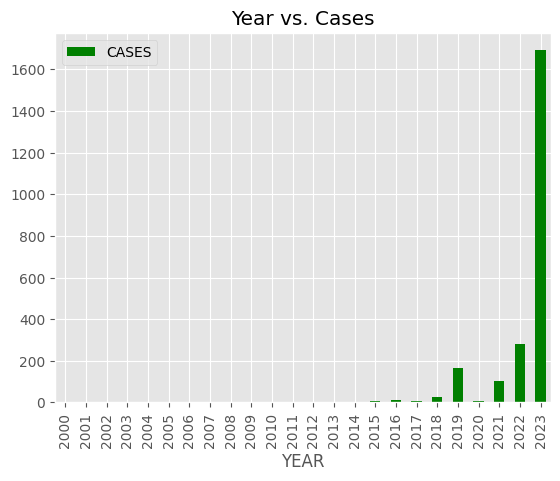

In [20]:
patient_grouped_by_year.plot(kind='bar',
                     x='YEAR',
                     y='CASES',
                     title='Year vs. Cases',
                     color='green')
plt.show()